In [1]:
import os
WM_PROJECT_USER_DIR=os.environ['WM_PROJECT_USER_DIR']
import sys 
sys.path.append(f"{WM_PROJECT_USER_DIR}/utilities")
import numpy as np
import pandas as pd
import postProcess.polyMesh2d as mesh2d
import postProcess.pyResconstruct as pyResconstruct
import postProcess.pyFigure as pyFigure
import postProcess.pyCompute as pyCompute
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import json
import proplot as plot
import concurrent.futures

data_folder=os.path.abspath('../postProcess')
save_folder=os.path.abspath('../postProcess/images')
transverse_data_folder=os.path.abspath("../postProcess/transverseAveragedData/")

%load_ext autoreload
%autoreload 2


In [2]:
# %load_ext autoreload
# %autoreload 2

# # import importlib
# # importlib.reload(pyCompute)

## Case Setting

In [3]:
Pe=0.1
DO2 =4.87334E-06
w = 30e-6
U_0   = Pe*DO2/w
rhof =6.0533
rhoST= 1.2758
pixelResolution=0.5e-6
print(f"average inlet velocity: {U_0} m/s")
print(f"air flux: {U_0*60} m3/(m2 min) ")
print(f"air flux at ST: {U_0*60*rhof/rhoST} m3/(m2 min) ")

print("----reference----")
print(f"reference air flux of CT experiments in LiuDong paper:0.24~1.90 m3/(m2 min)  ")
print(f"recommended min flux by Burger (Moore, 1999): 0.005~0.0133 m3 (ST)/(m2.min)")
print(f"usual air flux of CT expermients (Moore, 1999) : 0.486 m3 (ST)/(m2.min)")
print(f"Lloydminster type heavy oil min air flux (Moore, 1999): 0.0468 m3 (ST)/(m2.min) [cf rate: 0.15m/d] ")

print("---- combustion front velocity----")
print("reference cf rate (Moore, 1999): 0.15 m/d=> 1.73 um/s => pass 680um need about 386s")


average inlet velocity: 0.016244466666666665 m/s
air flux: 0.9746679999999999 m3/(m2 min) 
air flux at ST: 4.62451622856247 m3/(m2 min) 
----reference----
reference air flux of CT experiments in LiuDong paper:0.24~1.90 m3/(m2 min)  
recommended min flux by Burger (Moore, 1999): 0.005~0.0133 m3 (ST)/(m2.min)
usual air flux of CT expermients (Moore, 1999) : 0.486 m3 (ST)/(m2.min)
Lloydminster type heavy oil min air flux (Moore, 1999): 0.0468 m3 (ST)/(m2.min) [cf rate: 0.15m/d] 
---- combustion front velocity----
reference cf rate (Moore, 1999): 0.15 m/d=> 1.73 um/s => pass 680um need about 386s


### Comments
air flux is far away from the CT conditions

## Min/Max fields

In [4]:
file_path="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T573_Pe1e-1/postProcessing/minMaxComponents2/5.31/fieldMinMax.dat"
Ufile_path="/home/anoldfriend/OpenFOAM/anoldfriend-7/run/cokeCombustion/T573_Pe1e-1/postProcessing/minMaxMagnitude/5.31/fieldMinMax.dat"
sampling_rate=1

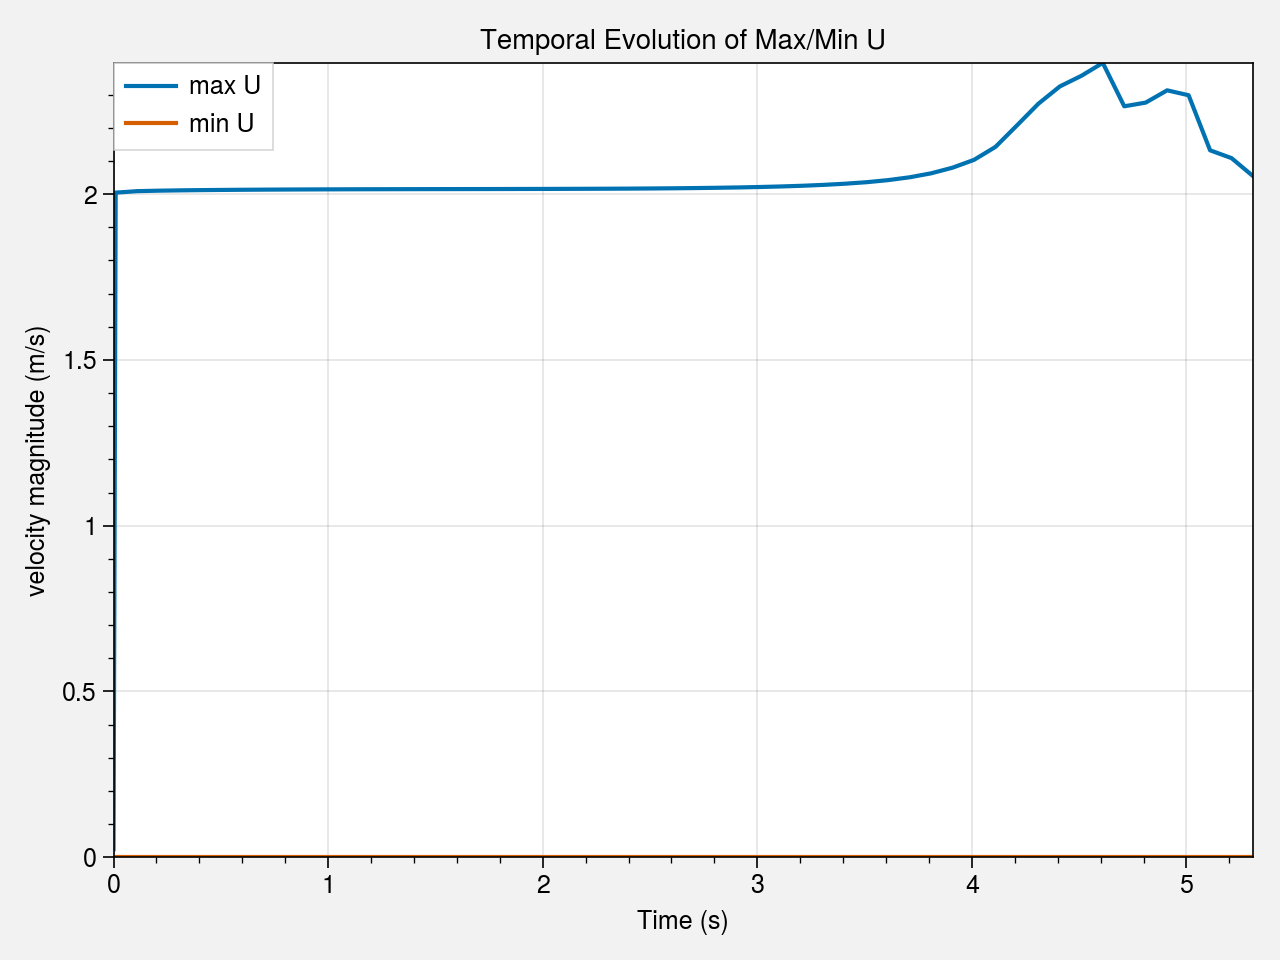

In [5]:
fig,ax,_=pyFigure.plot_min_max_field(Ufile_path,sampling_rate,"U","velocity magnitude (m/s)")

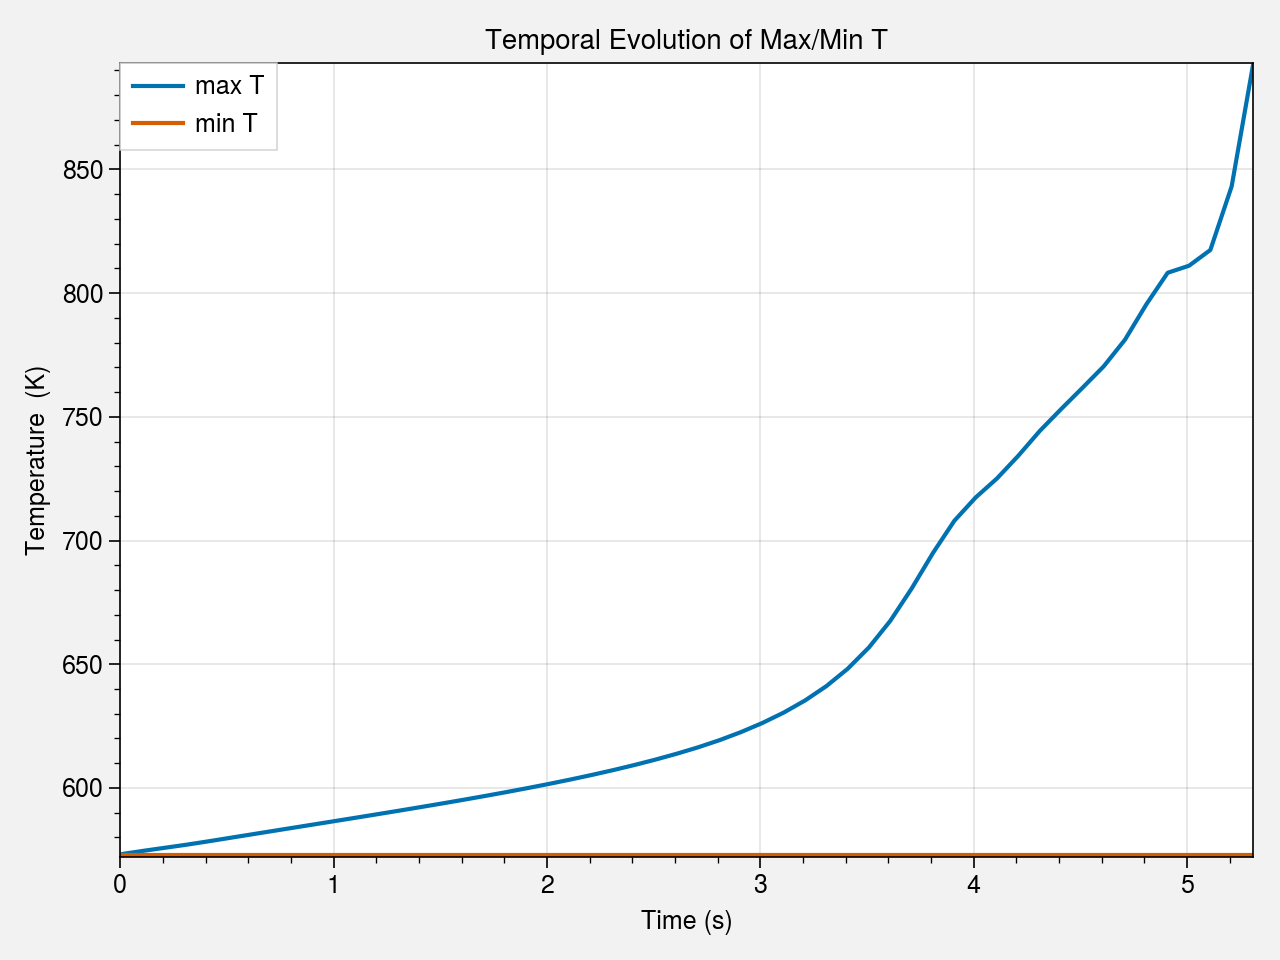

In [6]:
fig,ax,_=pyFigure.plot_min_max_field(file_path,sampling_rate,"T","Temperature  (K)")
ax.set_ylim([572,ax.get_ylim()[1]*1.001])
fig.tight_layout()

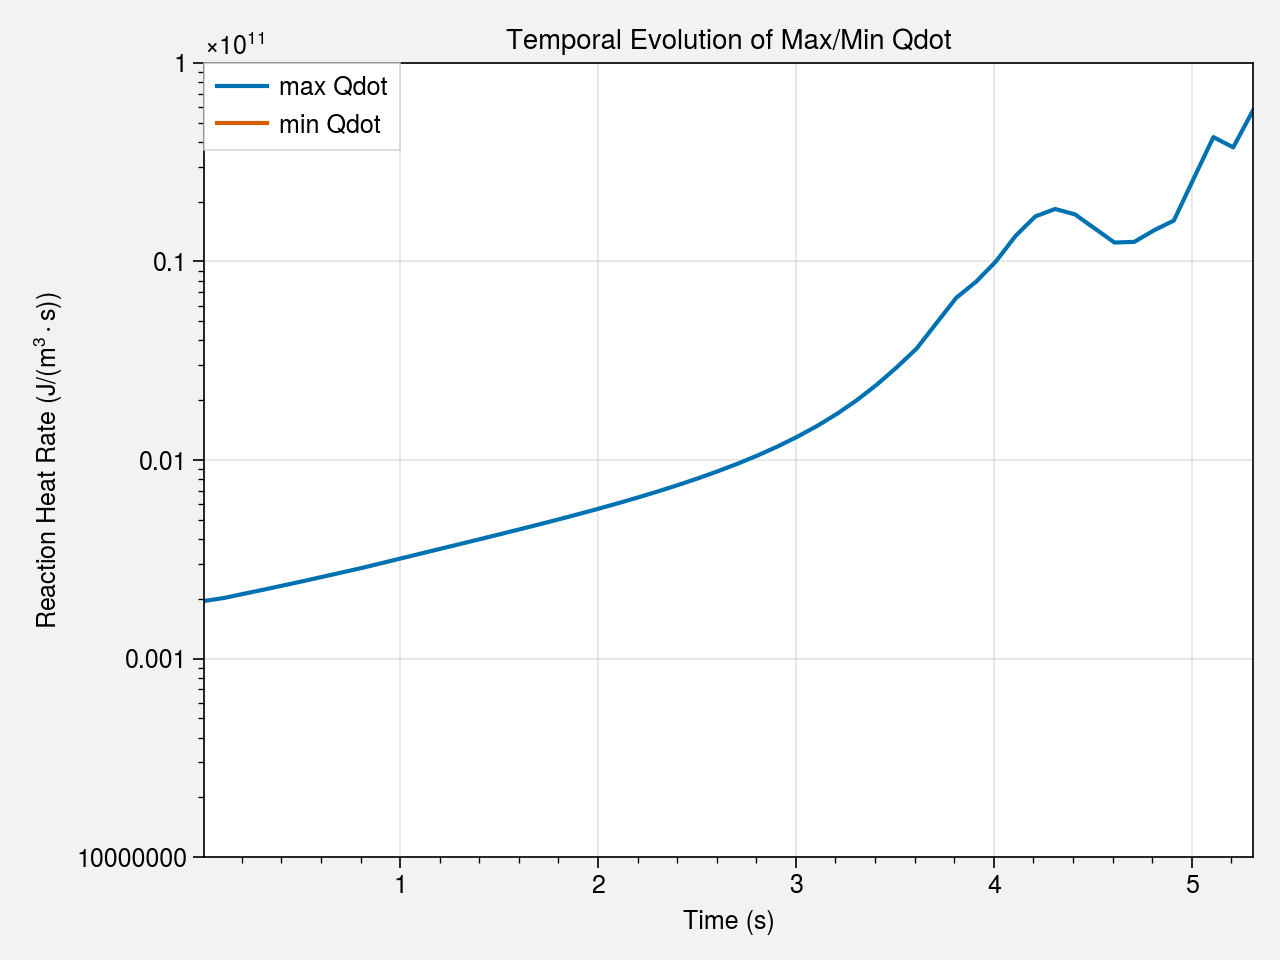

In [7]:
fig,ax,_=pyFigure.plot_min_max_field(file_path,sampling_rate,"Qdot","Reaction Heat Rate (J/(m$^3\cdot$s))","log")
# ax.set_xlim([0.1,8.2])
ax.set_ylim([1e7,1e11])
fig.tight_layout()

## Trasversly averaged fields

In [8]:
# workerNum=8
# compute_data_folder=os.path.abspath("../postProcess/transverseAveragedData/")
# pyCompute.batchComputeTransverselyAverages(data_folder,compute_data_folder)

# # script="/home/anoldfriend/OpenFOAM/anoldfriend-7/utilities/postProcess/pyCompute.py"
# # cmd = f"python {script} -d {data_folder} -s {compute_data_folder} -t all -n {workerNum} "
# # print(cmd)
# # os.system(cmd)

In [9]:
pyFigure.get_times_from_data_folder(transverse_data_folder)

array(['0.01', '0.11', '0.21', '0.31', '0.41', '0.51', '0.61', '0.71',
       '0.81', '0.91', '1.01', '1.11', '1.21', '1.31', '1.41', '1.51',
       '1.61', '1.71', '1.81', '1.91', '2.01', '2.11', '2.21', '2.31',
       '2.41', '2.51', '2.61', '2.71', '2.81', '2.91', '3.01', '3.11',
       '3.21', '3.31', '3.41', '3.51', '3.61', '3.71', '3.81', '3.91',
       '4.01', '4.11', '4.21', '4.31', '4.41', '4.51', '4.61', '4.71',
       '4.81', '4.91', '5.01', '5.11', '5.21', '5.31'], dtype='<U4')

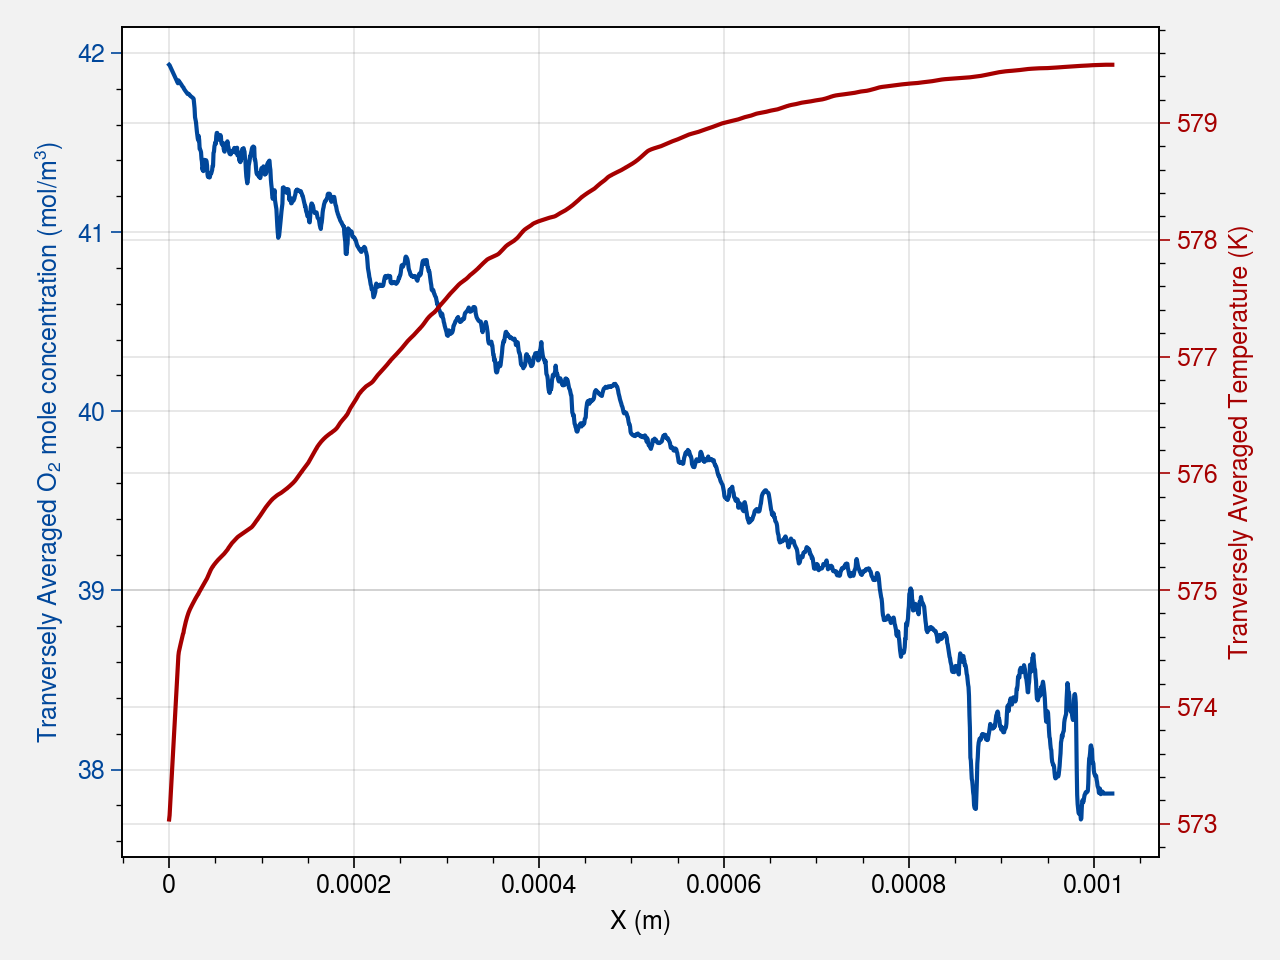

In [10]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"0.51")

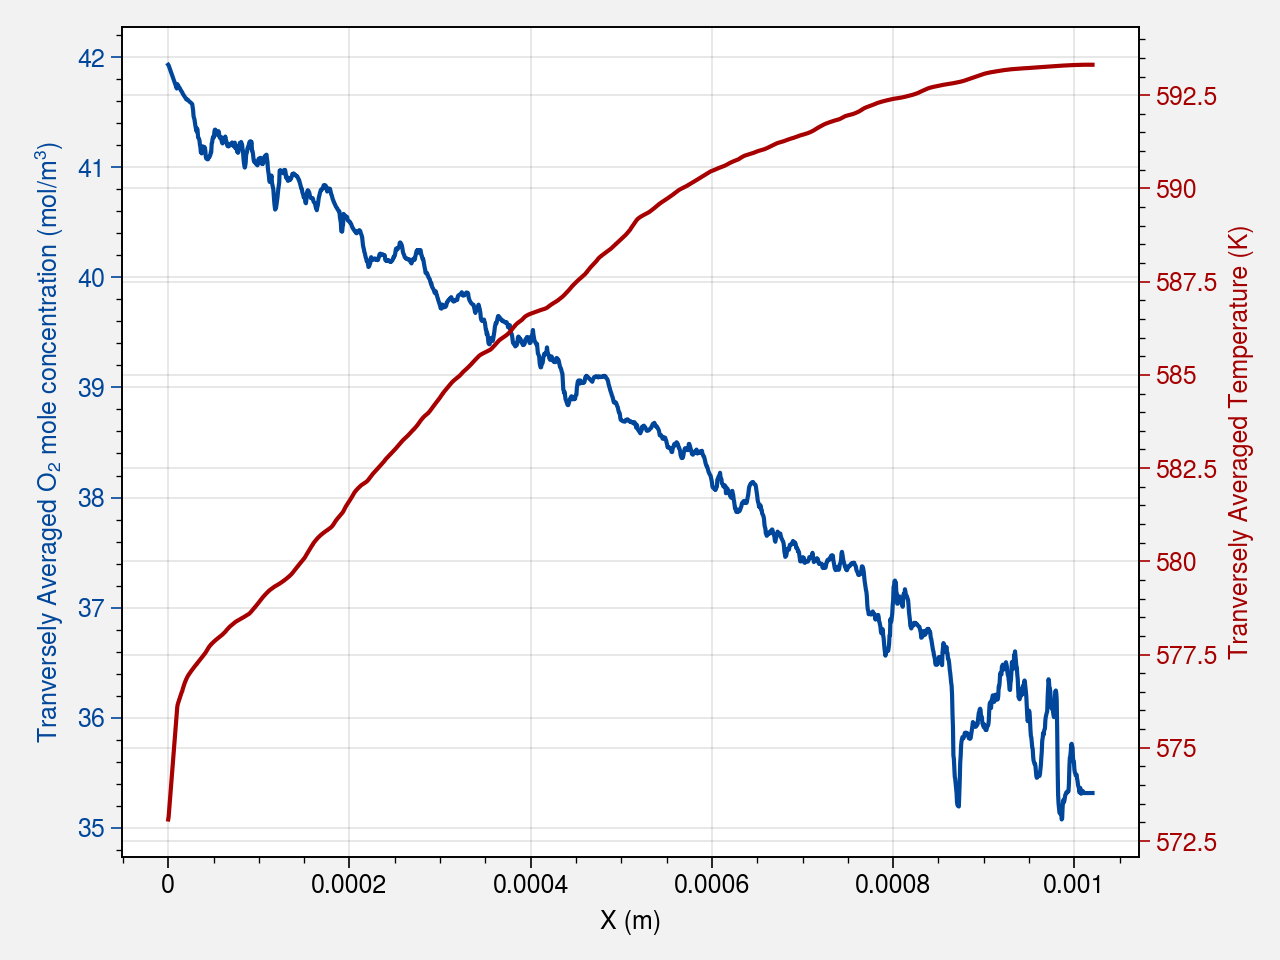

In [11]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"1.51")

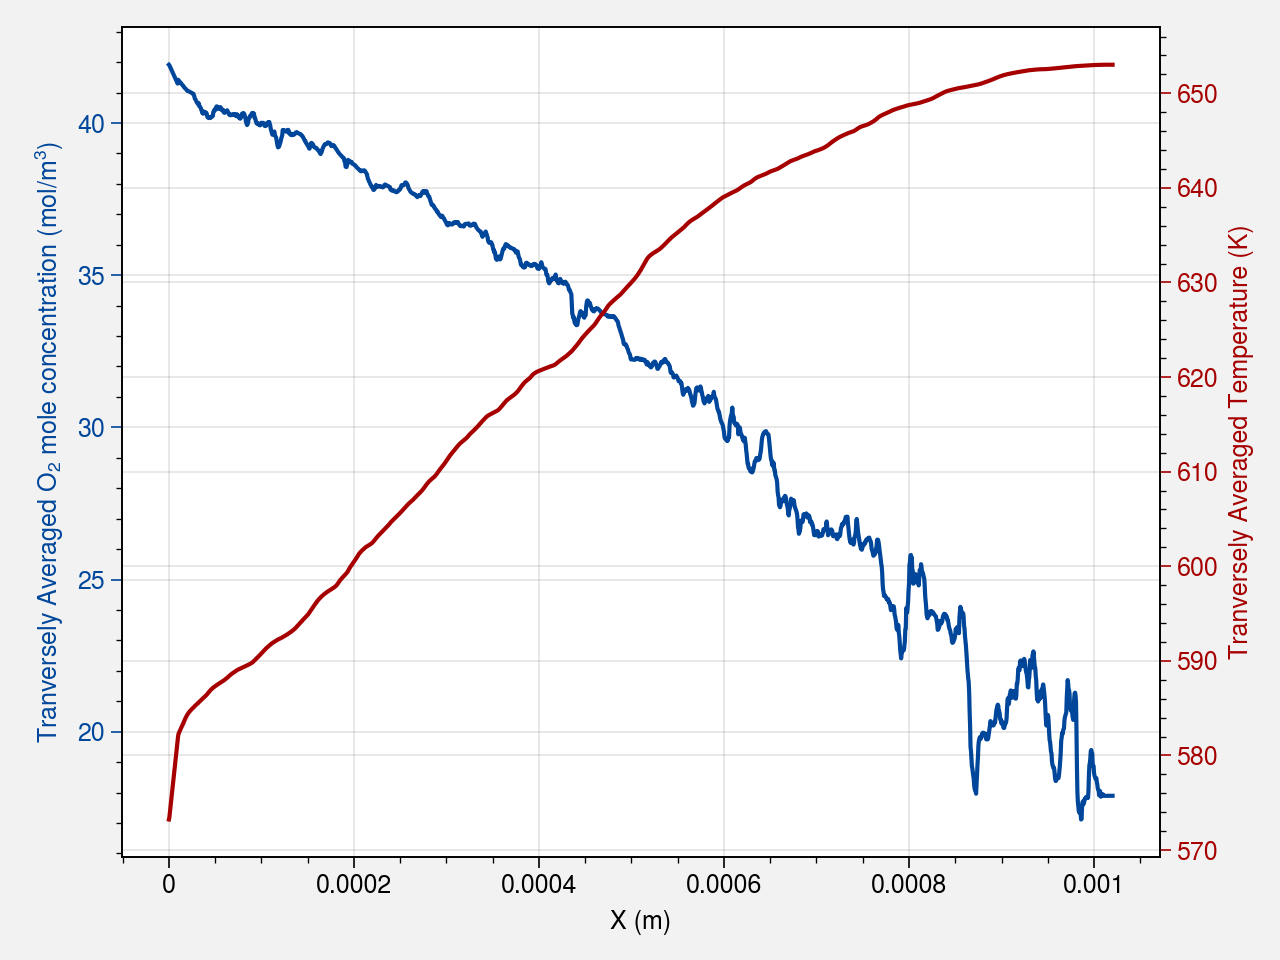

In [12]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"3.51")

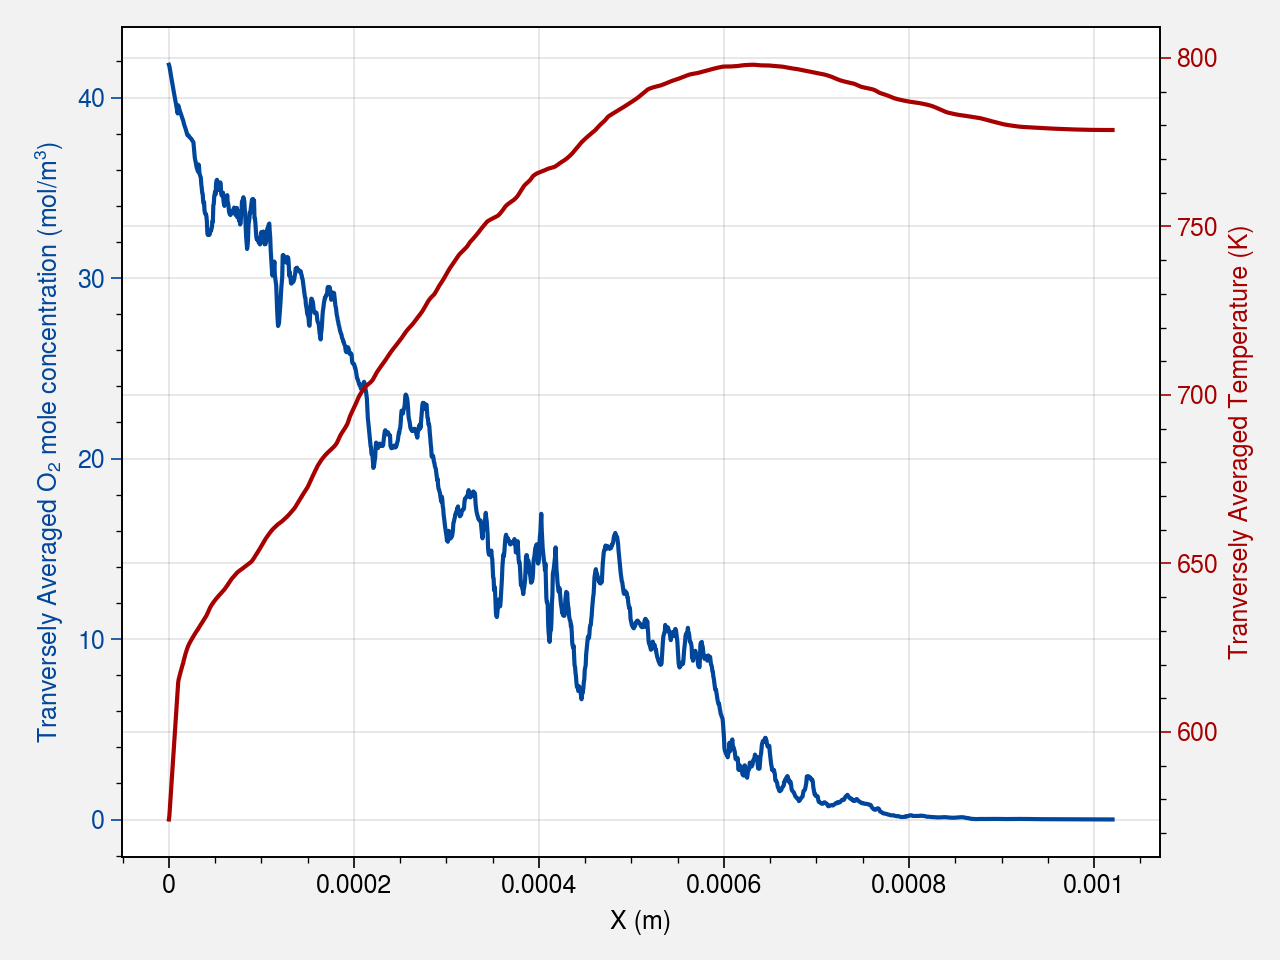

In [13]:
ax1,ax2,fig=pyFigure.plot_transverse_averages(transverse_data_folder,"5.01")

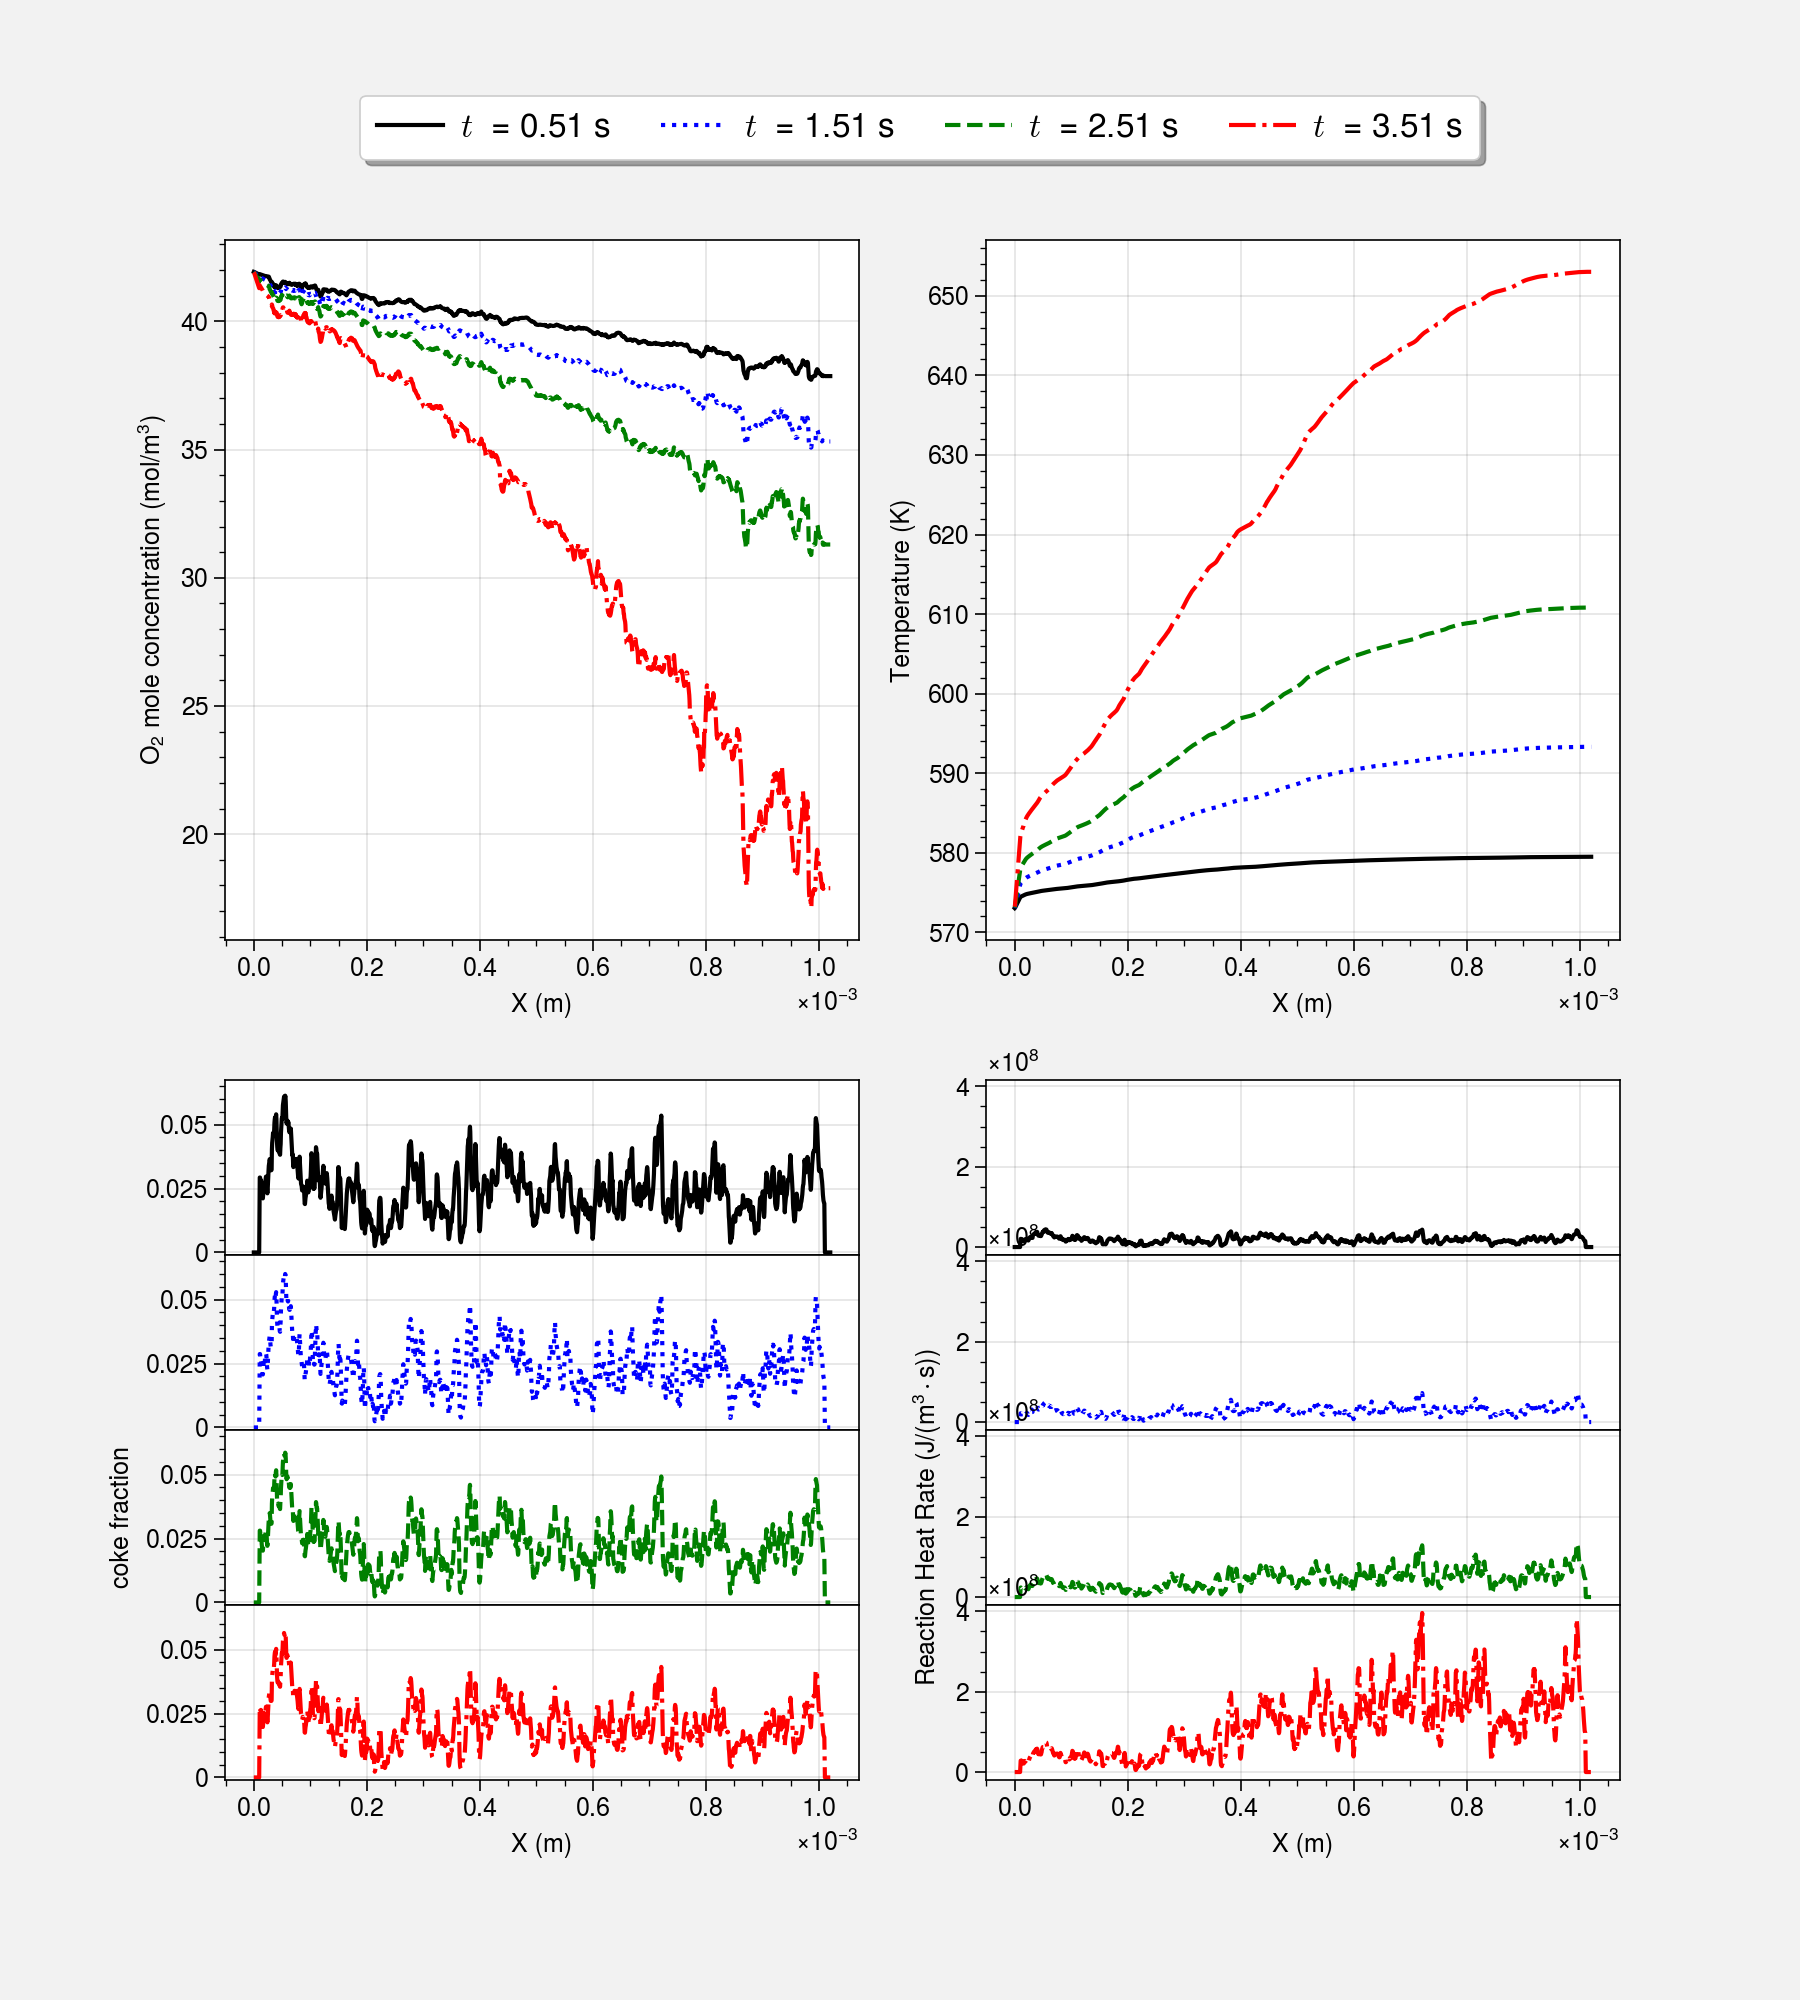

In [14]:
times=["0.51","1.51","2.51","3.51"]
fig=pyFigure.plot_transverse_averages_of_multiple_times(transverse_data_folder,times)


## comments:
1. At this stage, the combustion is controlled by the kinetics, where the oxygen transfer through all the domain with the coke combustion occurs everywhere. The temperature increased with time, resulting in the intensive chemical reaction and then lower down the oxygen molar concentration in the domain 

2. At this stage, the maximum temperature occur at the oulet due to the no significant combustion front as the diffusion-limited and convection-limited regime


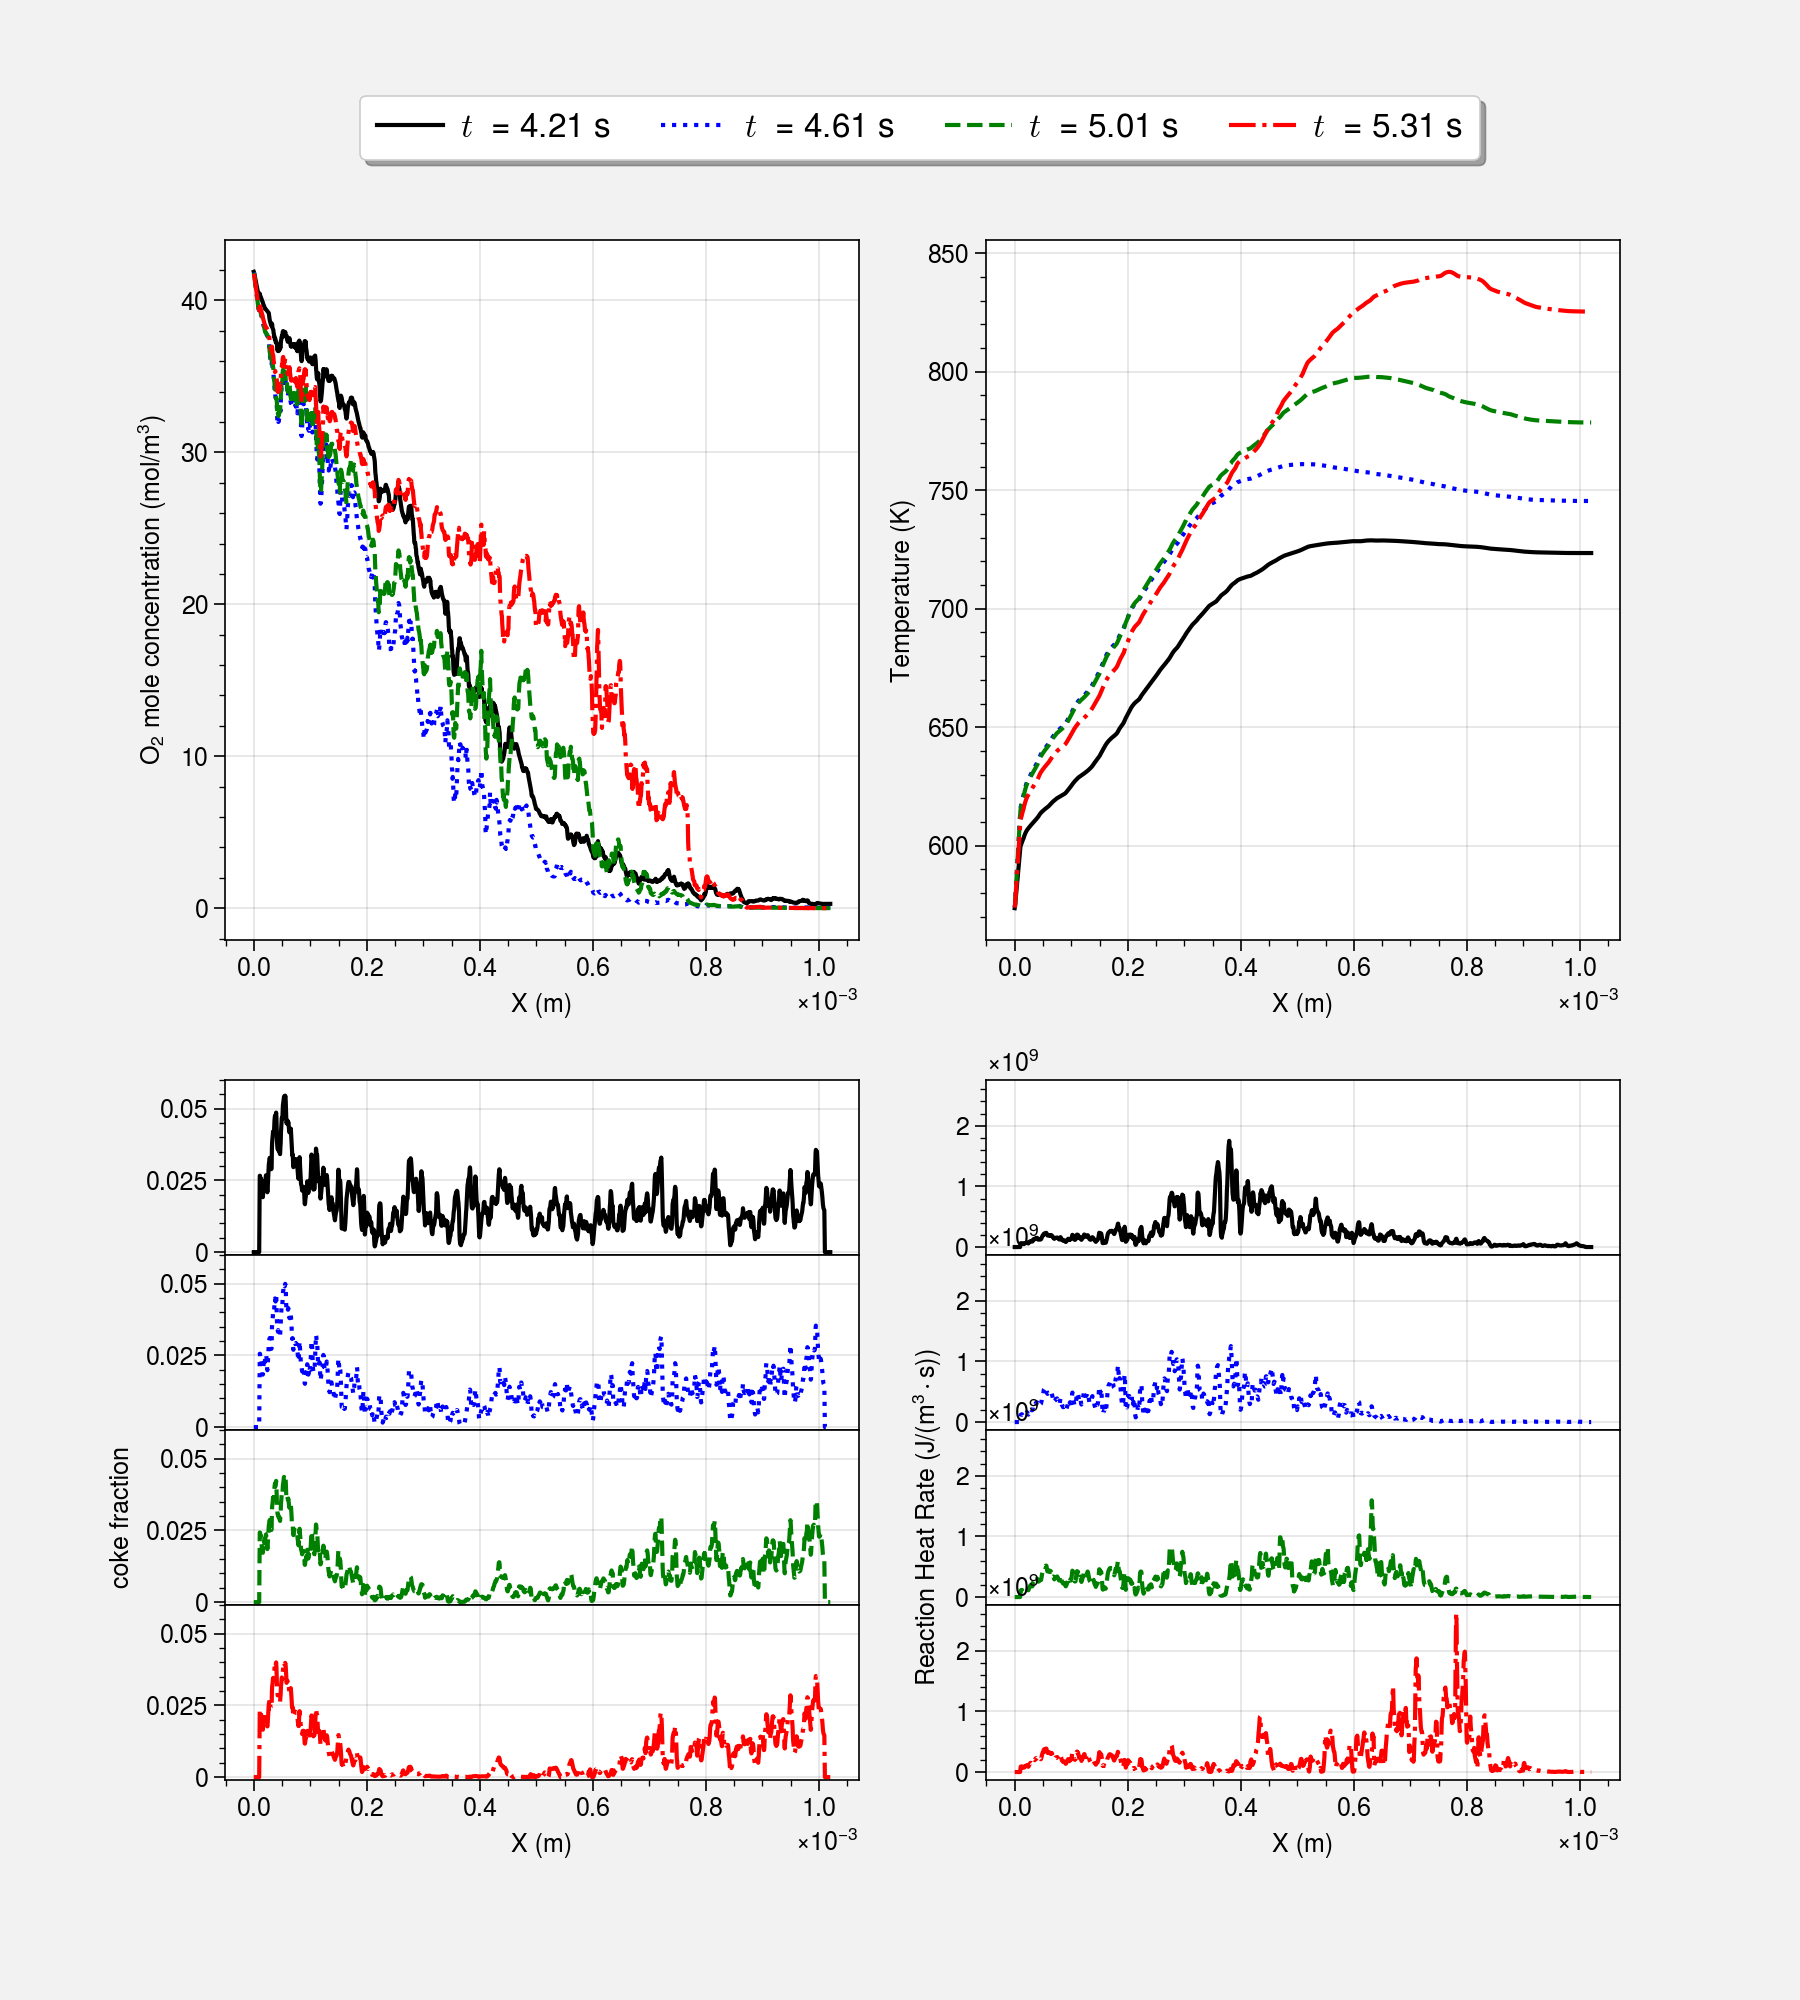

In [15]:
times=["4.21","4.61","5.01","5.31"]
fig=pyFigure.plot_transverse_averages_of_multiple_times(transverse_data_folder,times)


### comments:
1. The combustion transist from the kinetics-limited to the convection-limited regime since the increasing chemical reaction rate can consumed up all the O2 close to the outlet and then narrow down the reaction zone. 
2. At the convection-limited stage, the combustion front with the temperature peak occur with the maximum coke combustion rate
3. The coke combustion rate close to the inlet is lower than the combustion front due to the effect of low temperature air injection. Therefore, the coke close to the inlet is reside there during the computation duration. 

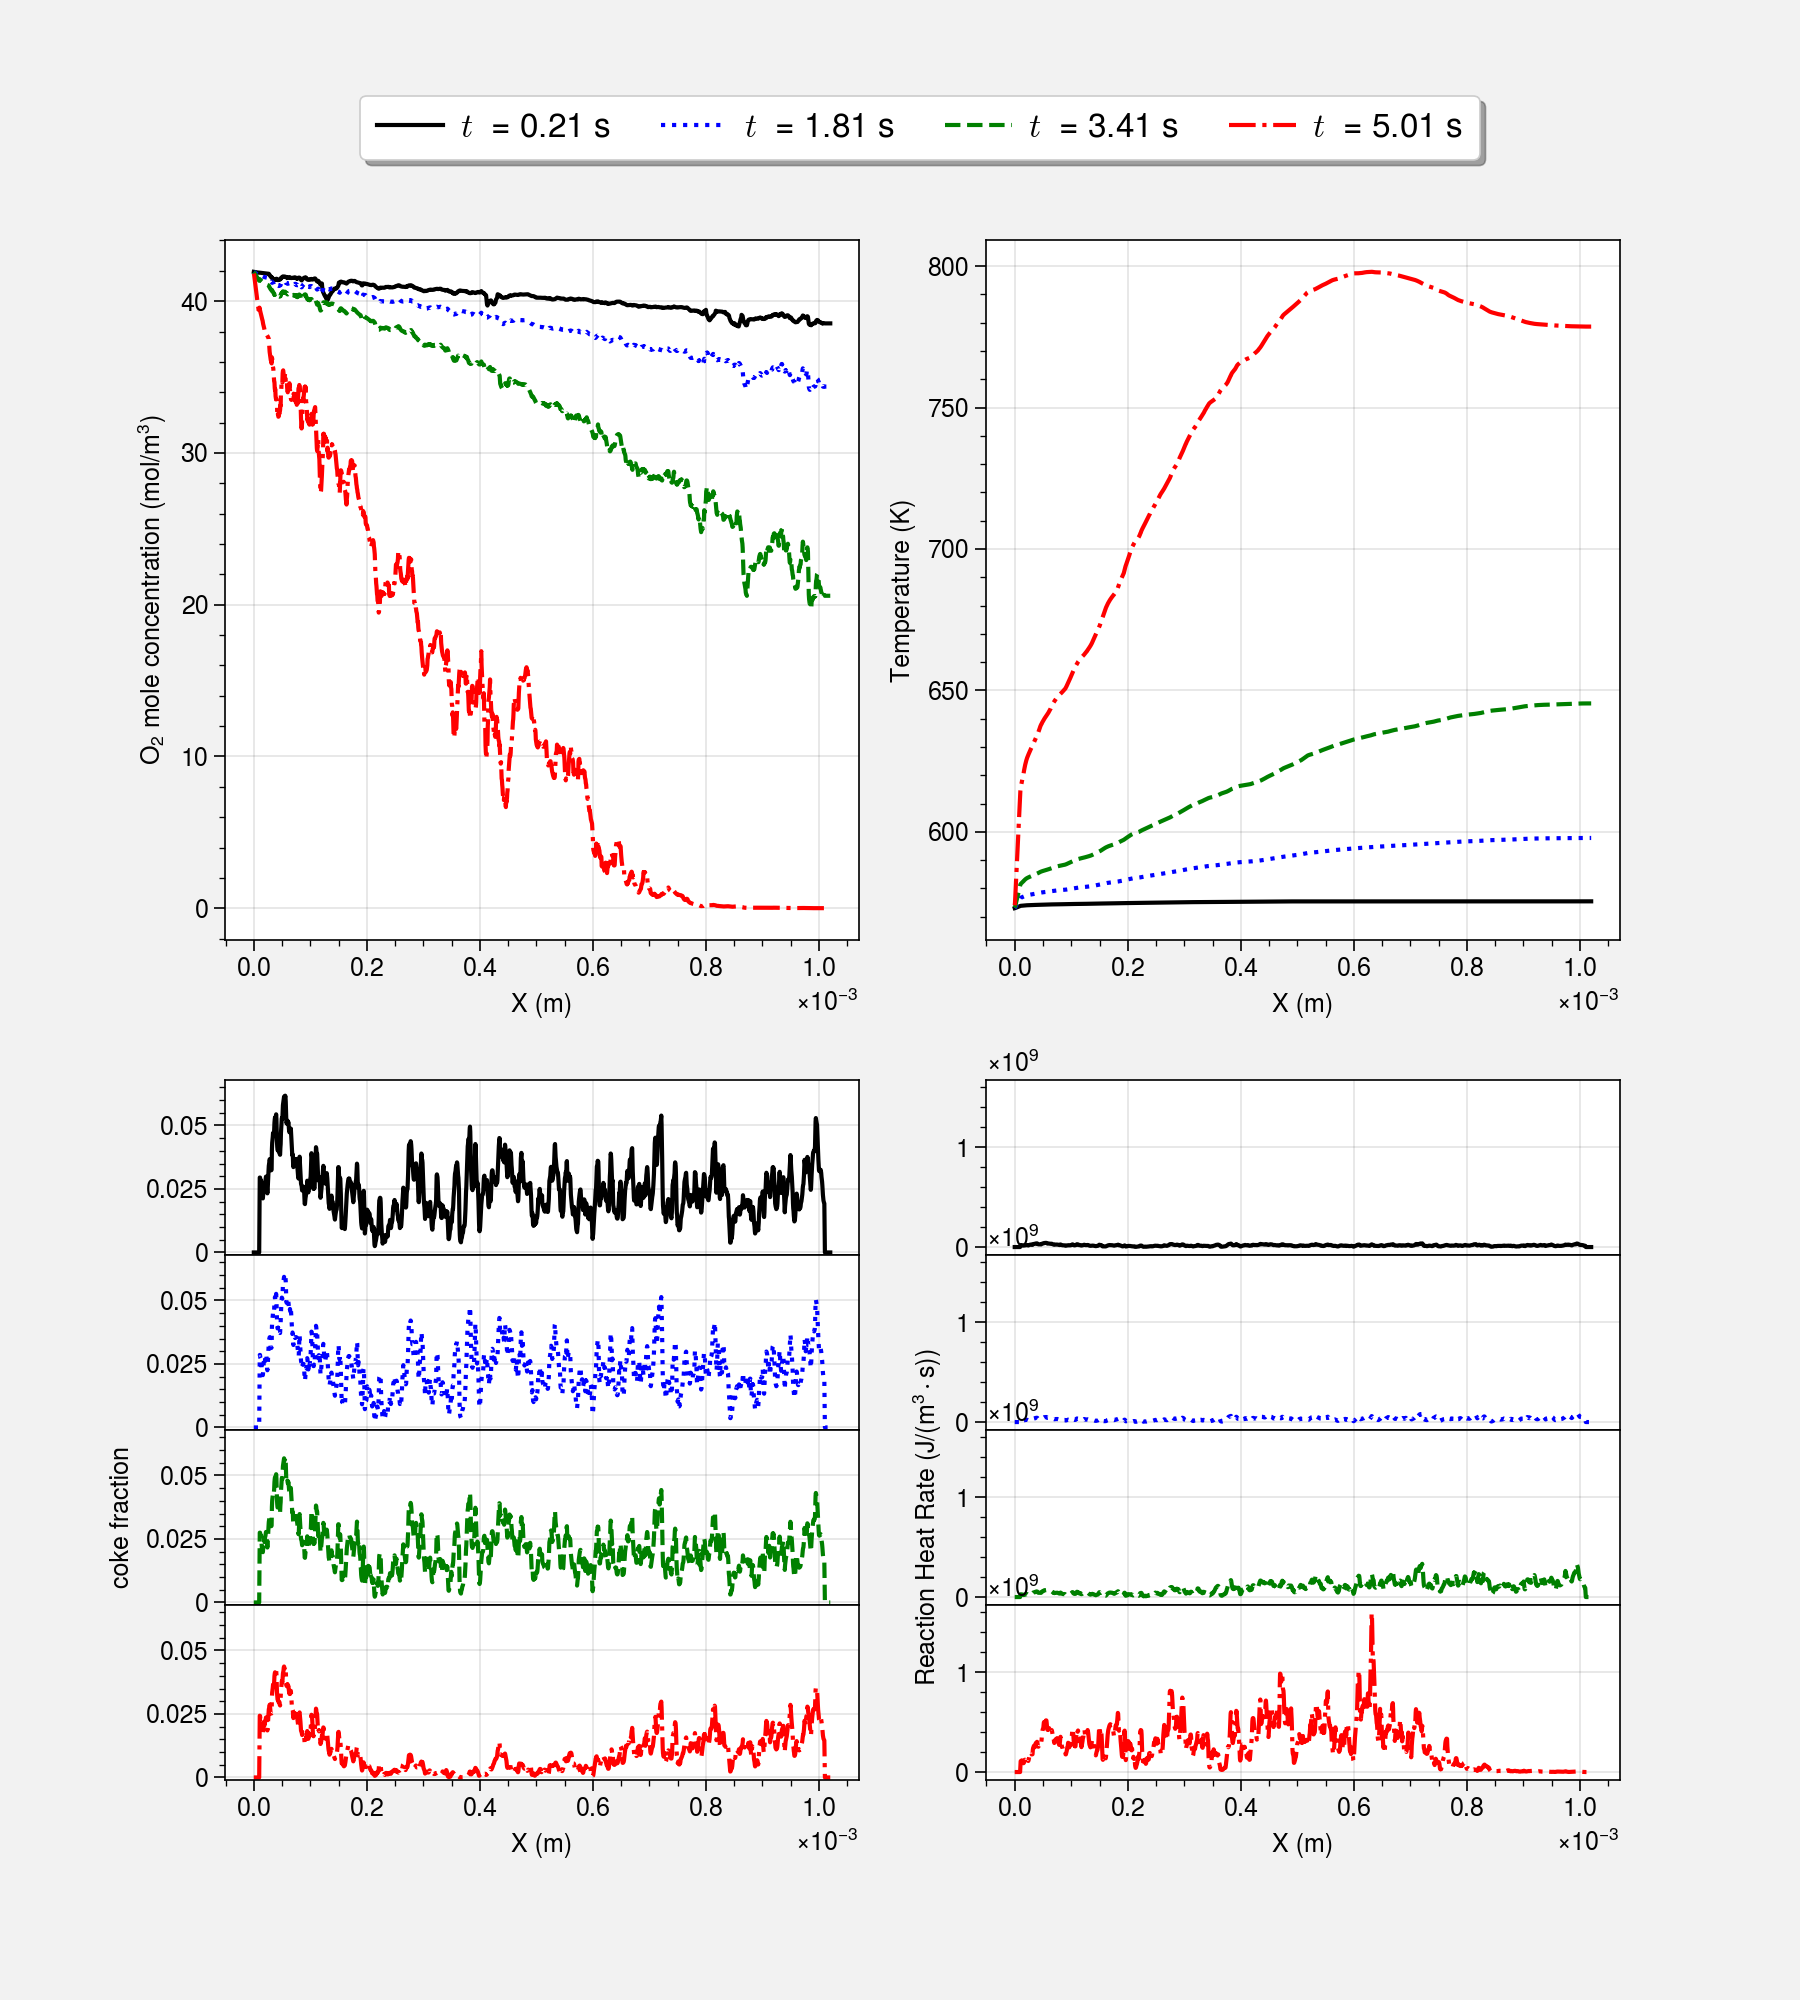

In [16]:
times=["0.21","1.81","3.41","5.01"]
fig=pyFigure.plot_transverse_averages_of_multiple_times(transverse_data_folder,times)


### comments:
1. The combustion transist from the kinetics-limited to the convection-limited regime 


In [17]:
fig.savefig("transverselyAveragesOfMultipleTimeInstants.jpg",bbox_inches='tight')

## Show the reaction rate and burning rate

(0.0, 10.0)

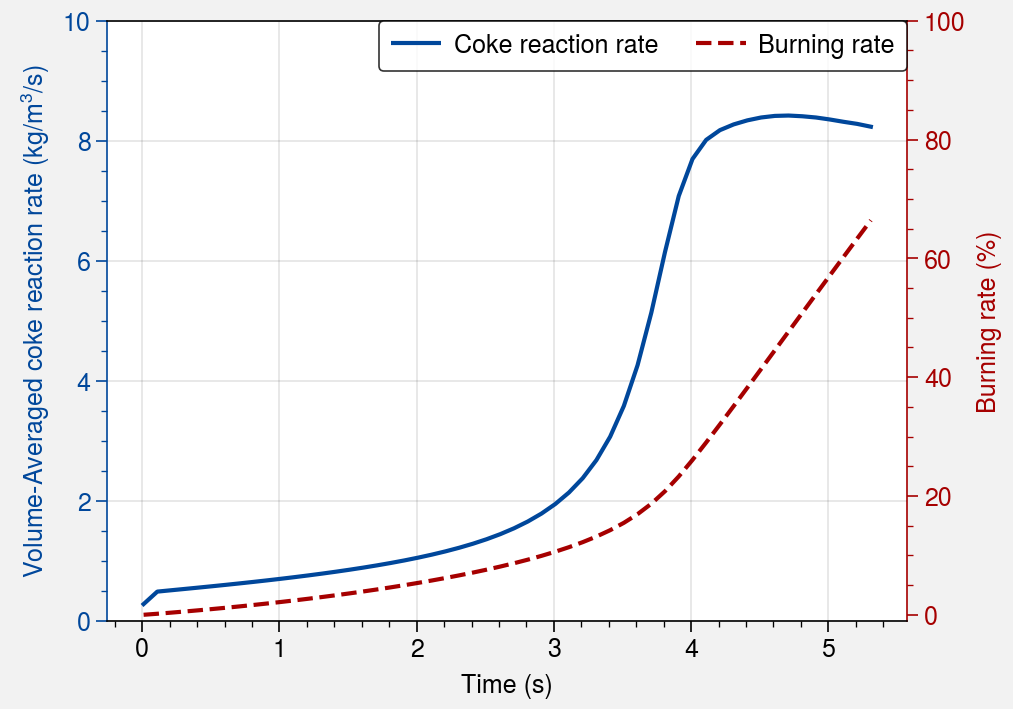

In [18]:
df_rate=pd.read_csv("../postProcess/others/ReactionRateAndBurningRate.csv")

ax1,ax2,fig=pyFigure.plot_reaction_rate_burning_rate(df_rate)
ax1.set_ylim([0,10])

## comments:
1. When the combustion changed from the kinetics limited to the convection limited, the coke chemical rate increase sharply 

In [19]:
fig.savefig("ReactionRateAndBurningRate.jpg",bbox_inches='tight')

In [20]:
df_O2_flux_at_inlet=pd.read_csv("../postProcess/others/O2FluxsAtInlet.csv")

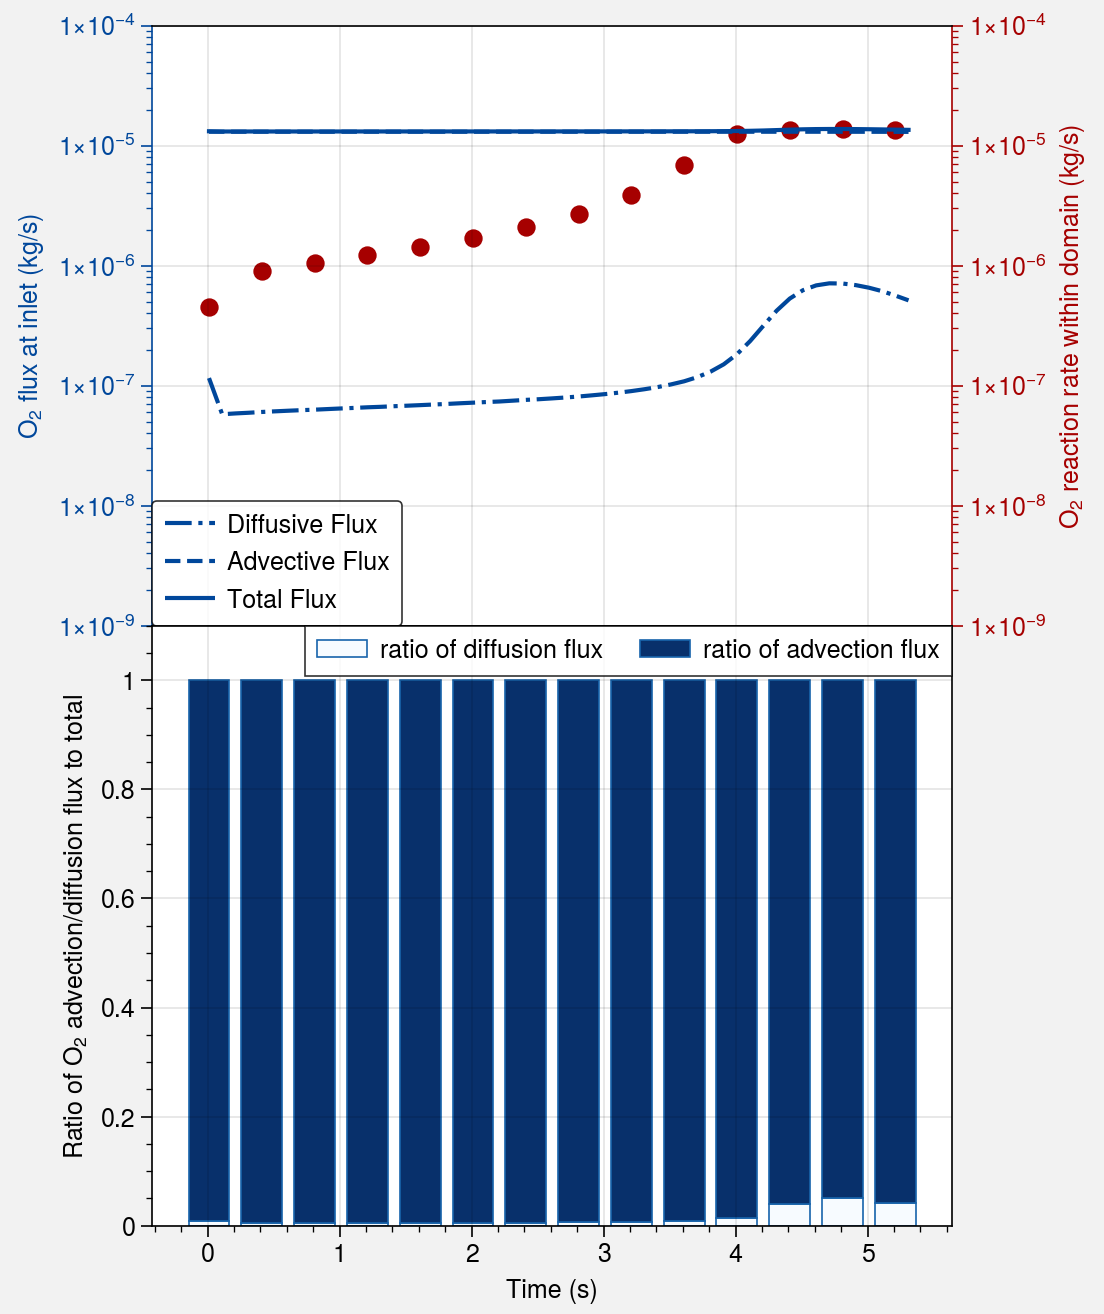

In [21]:
ax,ax2,fig=pyFigure.plot_O2_flux_reaction_rate(df_O2_flux_at_inlet,df_rate,pixelResolution,DO2,sampling_rate=4,ylim=(1e-9,1e-4))


In [22]:
fig.savefig("O2Flux_ReactionRate.jpg",bbox_inches='tight')

### Comments
1. the convection dominate the O2 species transfer. At the kinetics-limited regime, the O2 diffusion flux can be negliable due to the  low O2 concentration gradient at the inlet 
2. At the initial stage, the total chemical reaction rate is lower than the O2 flux since the O2  accumulate inside the domain with the increasing O2 concentration, meanwhile most of injected O2 leave away from the outelet
3. After the transition, the chemical reaction rate is equal to the O2 flux 

## Show the max temperature and O2 concentration at the outlet

In [23]:
df_combined=pyCompute.computeMaxTemperatureAndOutletO2ConcHistory(file_path,transverse_data_folder)

(-2.0, 50.0)

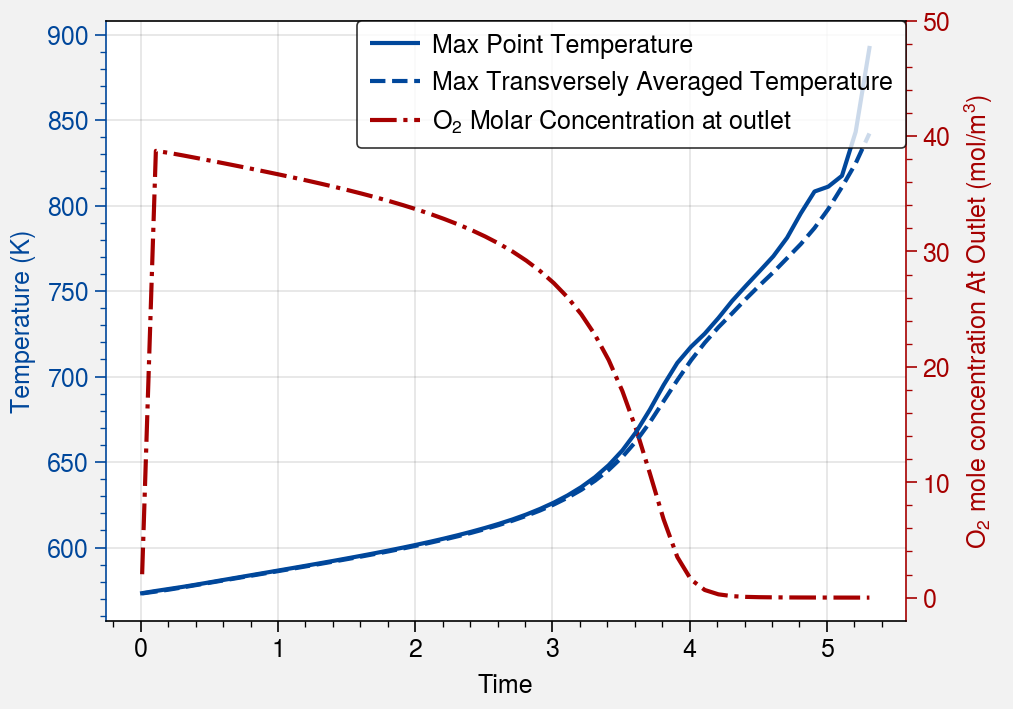

In [24]:
ax1,ax2,fig=pyFigure.Plot_MaxTemperature_OutletO2ConcHistory(df_combined)
ax2.set_ylim([-2,50])

In [25]:
fig.savefig("MaxTemperature_OutletO2ConcHistory.jpg",bbox_inches='tight')

### Comments
1. O2 leakage outside the domain, with lower Oxygen utilization at the kinetcis -limite regime 
2. When the temperature exceed the 625K (352oC), the temperature increased greatly with the outlet O2 molar concentration significantly decreased 


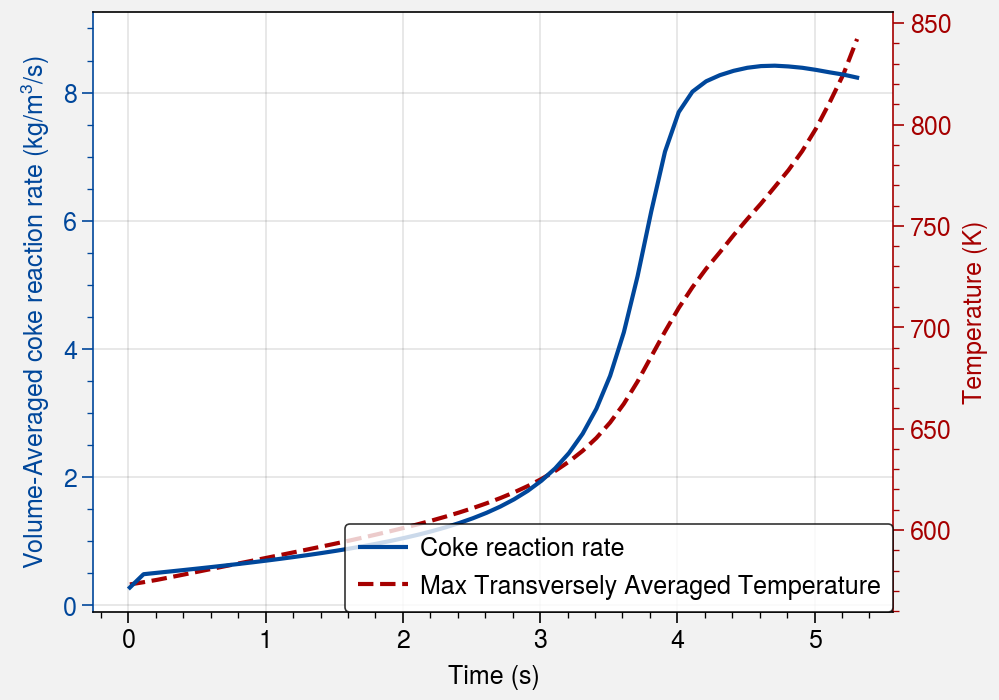

In [40]:
fig, ax = plot.subplots( aspect=(4, 3), axwidth=4)
c1 = plot.scale_luminance('cerulean', 0.5)
c2 = plot.scale_luminance('red', 0.5)

lns1=ax.plot(df_rate["time"],df_rate["vol_averaged_reaction_rate"],color=c1,
        label="Coke reaction rate")
max_rate=df_rate["vol_averaged_reaction_rate"].max()
ax.format(xlabel="Time (s)",ylabel="Volume-Averaged coke reaction rate (kg/m$^3$/s)", ycolor=c1,ylim=(-0.1,max_rate*1.1))

ax2 = ax.twinx()

lns2=ax2.plot(df_combined["Time"],df_combined["Transverse_Tmax"],color=c2,label="Max Transversely Averaged Temperature",linestyle="--")
ax2.format(xlabel="Time (s)",ylabel="Temperature (K)",ycolor=c2)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc="lr", ncol=1, fancybox=True)

## Comments

When the temperature exceed the 625K (352oC), the temperature and coke reaction rate increased greatly